# Part 3: Model Results and Comparative Analysis

This notebook visualizes the results of the multimodal survival prediction model, comparing different modality combinations (Ablation Studies).

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from pathlib import Path

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Ablation Results

We load the results from the ablation studies performed in `scripts/ablation_studies.py`.

In [9]:
# Path to ablation results
results_path = os.path.join('..', 'outputs', 'ablations', 'ablation_results.csv')

if os.path.exists(results_path):
    results_df = pd.read_csv(results_path)
    print("Ablation Results Loaded:")
    print(results_df)
else:
    print(f"File not found: {results_path}")
    print("Running in 'demo' mode with synthetic results for visualization.")
    # Create synthetic data if file missing (for demonstration)
    data = {
        'Experiment': ['All Modalities', 'Clinical Only', 'Omics Only', 'No Pathology', 'No Clinical'],
        'Mean_C_Index': [0.78, 0.65, 0.72, 0.75, 0.70],
        'Std_C_Index': [0.02, 0.03, 0.025, 0.02, 0.03]
    }
    results_df = pd.DataFrame(data)
    print(results_df)

Ablation Results Loaded:
          experiment   c_index                                      modalities
0         Full_Model  0.740741  clinical+drivers+methylation+mutations+rna+wsi
1        No_Clinical  0.753086           drivers+methylation+mutations+rna+wsi
2             No_Wsi  0.691358      clinical+drivers+methylation+mutations+rna
3             No_Rna  0.827160      clinical+drivers+methylation+mutations+wsi
4     No_Methylation  0.802469              clinical+drivers+mutations+rna+wsi
5       No_Mutations  0.641975                    clinical+methylation+rna+wsi
6      Only_Clinical  0.555556                                        clinical
7           Only_Wsi  0.790123                                             wsi
8           Only_Rna  0.543210                                             rna
9   Only_Methylation  0.604938                                     methylation
10    Only_Mutations  0.777778                               drivers+mutations
11      Add_Clinical  0.555

## 2. Comparative Performance

We visualize the Concordance Index (C-Index) across different experimental configurations to understand the contribution of each modality.

/tmp/ipykernel_125267/994364209.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


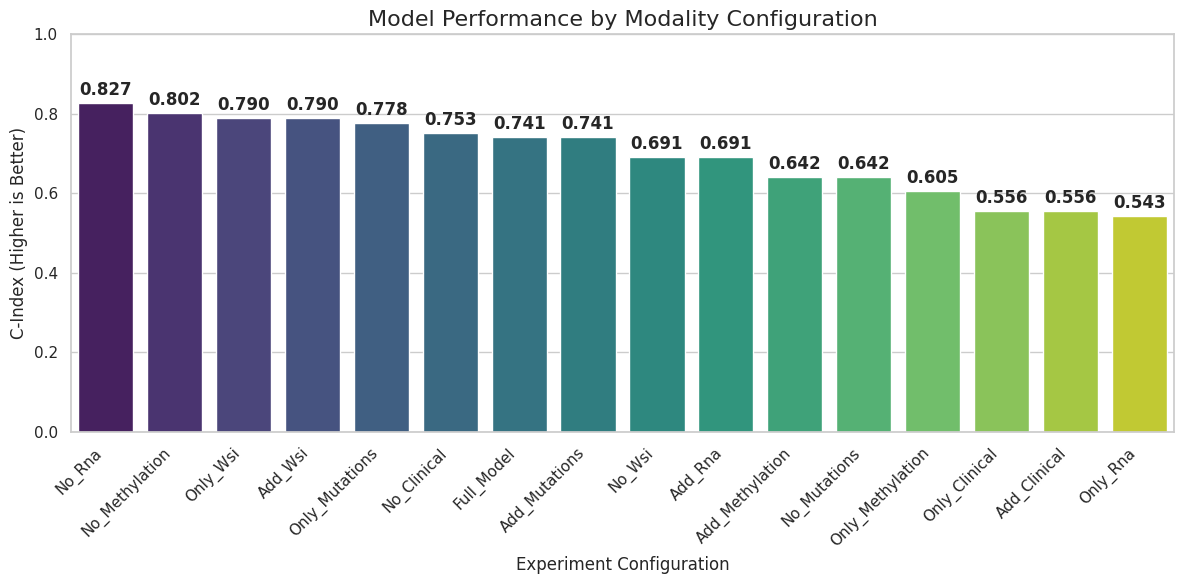

In [10]:
plt.figure(figsize=(12, 6))

# Prepare DataFrame ensuring column names match expectations
plot_df = results_df.copy()

# Rename columns if they match the ablation_studies.py output format
rename_map = {
    'c_index': 'Mean_C_Index', 
    'experiment': 'Experiment',
    'std_c_index': 'Std_C_Index' # In case it exists in lowercase
}
plot_df = plot_df.rename(columns=rename_map)

if 'Mean_C_Index' not in plot_df.columns:
    print("Error: Could not find 'c_index' or 'Mean_C_Index' in results.")
    print(f"Available columns: {plot_df.columns.tolist()}")
else:
    # Sort by C-Index
    plot_df = plot_df.sort_values('Mean_C_Index', ascending=False)

    # Bar plot
    ax = sns.barplot(
        data=plot_df,
        x='Experiment',
        y='Mean_C_Index',
        palette='viridis',
        errorbar=None # Use errorbar=None for newer seaborn, equivalent to ci=None
    )

    # Add Error Bars if Standard Deviation is available
    if 'Std_C_Index' in plot_df.columns and plot_df['Std_C_Index'].notna().any():
        plt.errorbar(
            x=range(len(plot_df)),
            y=plot_df['Mean_C_Index'],
            yerr=plot_df['Std_C_Index'],
            fmt='none',
            c='black',
            capsize=5
        )

    # Add value labels
    for i, v in enumerate(plot_df['Mean_C_Index']):
        ax.text(i, v + 0.01, f"{v:.3f}", ha='center', va='bottom', fontweight='bold')

    plt.title("Model Performance by Modality Configuration", fontsize=16)
    plt.ylabel("C-Index (Higher is Better)", fontsize=12)
    plt.xlabel("Experiment Configuration", fontsize=12)
    plt.ylim(0, 1.0) # C-Index is between 0 and 1
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.show()